# Section 4.1: Numerical Differentiation

In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In this code, we explore finite differences numerical differentiation.  The new `numpy` routines that will be used are listed below for your reference.  
* [NumPy vstack()](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.vstack.html)
* [NumPy transpose()](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.transpose.html)
* [NumPy diag()](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.diag.html)
* [NumPy size()](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.generic.size.html)
* [NumPy linalg.solve()](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.linalg.solve.html)

## Creating Forward & Centered Differences

Given $f(x)$, we would like to estimate the derivative $f'(x)$.  Two of the methods derived in class are listed below:
* **Forward Difference, Order 1** $$\displaystyle f'(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{O}(h)$$
* **Centered Difference, Order 1** $$\displaystyle f'(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}(h^2)$$

In the code below, we create two separate functions `forward_d` and `centered_d` that take as inputs the following:
* The function handle `f`
* A value `x`
* A spacing `h`

In [157]:
def forward_d(f,x,h):
    return (f(x+h)-f(x))/h

def centered_d(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

def complex_d(f,x,h):
    return np.imag((f(x+1j*h)/h))

### Testing the forward and centered differences

Now, let's test our numerical method for approximating $f'(x)$ using $f(x) = x^3$.  

In [158]:
f = lambda x: x**3             # Define the function we would like to differentiate
fPrime = lambda x: 3*x**2      # The true derivative; used for calculating the error


In [159]:
forward_d(f,1,.1)

3.310000000000004

In [160]:
centered_d(f,1,.1)

3.0100000000000016

In [161]:
fPrime(1)

3

## Investigating the Error
Now, let's investigate how the error changes as we decrease the value of $h$.  In what follows, we create an array of $h$ values of the following form:
```
h = .1**np.arange(0,6)
```
which gives 
```
array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05])
```
as the output.  Then, we can calculate the error by looking at the one-norm of the difference between the approximation and the true value of the derivative.  For simplicity, we investigate the derivative at the point $x = 1$.  

In [170]:
h = .1**np.arange(0,6)  # alternatively, you could use h = np.logspace(-5,0,6)
x = 1

errFD = np.abs(forward_d(f,x,h)-fPrime(x))
errCD = np.abs(centered_d(f,x,h)-fPrime(x))                   
errID = np.abs(complex_d(f,x,h)-fPrime(x))
err = np.vstack([errFD,errCD,errID]).T


When we plot the errors, we should see that on a `loglog` plot, the slope of the error for the forward-difference, order 1 method should be 1, and the slope of the error for the centered-difference, order 2 method should be 2.  

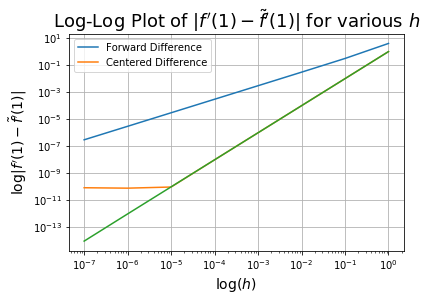

In [171]:
plt.loglog(h,err)
plt.legend(["Forward Difference","Centered Difference"])
plt.grid()
plt.title(r'Log-Log Plot of $\left\vert f^\prime(1) - \tilde{f}^\prime(1)\right\vert$ for various $h$',fontsize=18)
plt.xlabel(r'$\log(h)$',fontsize=14)
plt.ylabel(r'$\log\left\vert f^\prime(1) - \tilde{f}^\prime(1)\right\vert$',fontsize=14)
plt.show()

In [172]:
np.imag(f(1 + 1j*.1)/.1)

2.99

In [148]:
centered_d(f,1,.1)

3.0100000000000016